In [ ]:
%pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [12]:
# change data_path according to the path of data
current_path = os.getcwd()
print("current pth:", current_path)
#data_path = os.path.dirname(current_path)
if os.path.exists("02_Data"):
    data_path = ("02_Data")
    print("Data has been founded at:", data_path)
else:
    print("Can`t find Data")
Audio_path = os.path.join(data_path,"01_Audio")
#print("Audio:", Audio_path)
Audio_files = [ f for f in os.listdir(Audio_path) if f.endswith(".csv")]
print("Audio_files are: ", Audio_files)
list_Audio = []
id_Audio = []
for file_name in Audio_files:
    file_path = os.path.join(Audio_path,file_name)
    #get data
    df = pd.read_csv(file_path)
    list_Audio.append(df)
    #get data id
    id_Audio.append(int(os.path.splitext(os.path.basename(file_path))[0]))
print("Audio_len: ",len(list_Audio))
print("shape of list_Audio:", list_Audio[0].shape) 


Weldqas_path = os.path.join(data_path,"02_Weldqas")
Weldqas_files = [ j for j in os.listdir(Weldqas_path) if j.endswith(".csv")]
print("Weldqas_files are: ", Weldqas_files)
list_Weldqas = []
for file_name in Weldqas_files:
    file_path = os.path.join(Weldqas_path,file_name)
    df = pd.read_csv(file_path)
    list_Weldqas.append(df)
print("Weldqas_len: ",len(list_Weldqas))
print("shape of list_Weldqas:", list_Weldqas[0].shape) 
##get the path o excel
excel_paths = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".xlsx"):
            excel_paths.append(os.path.join(data_path,file))
print(excel_paths)

current pth: /Users/macbook/Desktop/TUM/kecheng/KIGp
Data has been founded at: 02_Data
Audio_files are:  ['223.csv', '237.csv', '169.csv', '196.csv', '182.csv', '357.csv', '343.csv', '425.csv', '419.csv', '394.csv', '380.csv', '381.csv', '395.csv', '418.csv', '342.csv', '424.csv', '356.csv', '183.csv', '197.csv', '236.csv', '222.csv', '234.csv', '220.csv', '208.csv', '181.csv', '195.csv', '426.csv', '340.csv', '354.csv', '368.csv', '383.csv', '397.csv', '396.csv', '382.csv', '369.csv', '355.csv', '427.csv', '341.csv', '194.csv', '180.csv', '209.csv', '221.csv', '235.csv', '219.csv', '231.csv', '225.csv', '184.csv', '190.csv', '379.csv', '345.csv', '423.csv', '351.csv', '386.csv', '392.csv', '393.csv', '387.csv', '350.csv', '344.csv', '422.csv', '378.csv', '191.csv', '185.csv', '224.csv', '230.csv', '218.csv', '226.csv', '232.csv', '178.csv', '193.csv', '187.csv', '408.csv', '352.csv', '420.csv', '346.csv', '391.csv', '385.csv', '384.csv', '390.csv', '421.csv', '347.csv', '353.csv', '40

      Time [s]  Current [A]  Voltage [V]  Wire [m/min]
0     0.000000         11.7         0.83           0.0
1     0.000043         12.7         0.68           0.0
2     0.000085         13.2         0.68           0.0
3     0.000128         15.6         0.54           0.0
4     0.000170         15.2         0.00           0.0
...        ...          ...          ...           ...
4696  0.199583         18.1         0.00           0.0
4697  0.199626         16.1        -0.54           0.0
4698  0.199668         14.2        -0.54           0.0
4699  0.199711         12.7        -0.54           0.0
4700  0.199754         11.2        -0.54           0.0

[4701 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time [s]      4701 non-null   float64
 1   Current [A]   4701 non-null   float64
 2   Voltage [V]   4701 non-null   fl

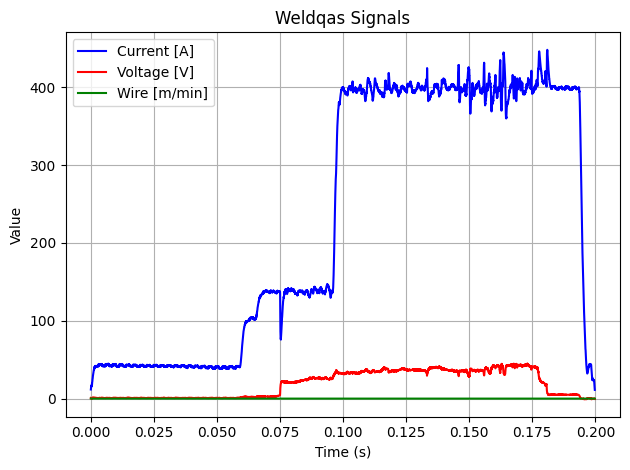

In [13]:
# read single file

file_path = os.path.join(Weldqas_path,"169.csv")
df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')
print(df)
df.info()
"""
plt.figure(1)
x = df["Time [s]"]
y = df["Current [A]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.figure(2)
x = df["Time [s]"]
y = df["Voltage [V]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.figure(3)
x = df["Time [s]"]
y = df["Wire [m/min]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Wire (m/min)")
"""
plt.plot(df["Time [s]"], df["Current [A]"], label="Current [A]", color="blue")
plt.plot(df["Time [s]"], df["Voltage [V]"], label="Voltage [V]", color="red")
plt.plot(df["Time [s]"], df["Wire [m/min]"], label="Wire [m/min]", color="green")

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Weldqas Signals")
plt.legend()  
plt.grid(True)
plt.tight_layout()
plt.show()




Standard Deviation of Current: 166.49 A
Standard Deviation of Voltage: 17.36 V


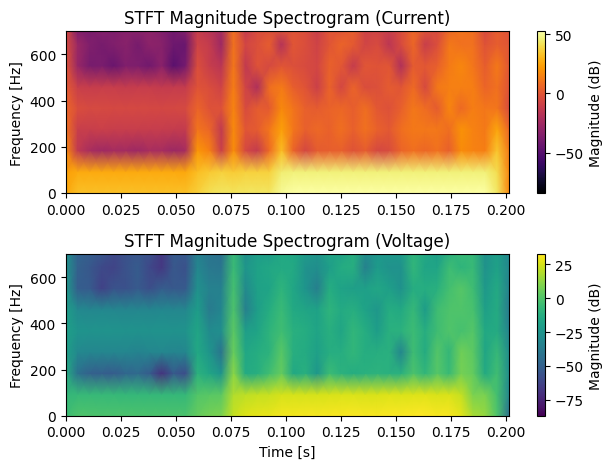

In [16]:
from scipy.signal import stft

file_path = os.path.join(Weldqas_path,"318.csv")

df = pd.read_csv(file_path)

t = df["Time [s]"]
current = df["Current [A]"]
voltage = df['Voltage [V]']

fs = 1 / (t[1] - t[0])

f_c, t_c, Zxx_c = stft(current, fs, nperseg=256)
f_v, t_v, Zxx_v = stft(voltage, fs, nperseg=256)

#Zxx_magnitude = np.abs(Zxx)  #Amplitude spectrum

# current subplot
plt.subplot(2, 1, 1)
plt.pcolormesh(t_c, f_c, 20 * np.log10(np.abs(Zxx_c)), shading='gouraud', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.title('STFT Magnitude Spectrogram (Current)')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 700)

# voltage subplot
plt.subplot(2, 1, 2)
plt.pcolormesh(t_v, f_v, 20 * np.log10(np.abs(Zxx_v)), shading='gouraud', cmap='viridis')
plt.colorbar(label='Magnitude (dB)')
plt.title('STFT Magnitude Spectrogram (Voltage)')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 700)

std_current = np.std(current)
std_voltage = np.std(voltage)

print(f"Standard Deviation of Current: {std_current:.2f} A")
print(f"Standard Deviation of Voltage: {std_voltage:.2f} V")

plt.tight_layout()
plt.show()

In [18]:
import shutil
from scipy.signal import stft

csv_folder = "/Users/macbook/Desktop/TUM/kecheng/KIGp/02_Data/02_Weldqas"         
img_folder = "spectrogram_images"  
output_dir = "data"              

good_dir = os.path.join(output_dir, "good")
bad_dir = os.path.join(output_dir, "bad")

os.makedirs(img_folder, exist_ok=True)
os.makedirs(good_dir, exist_ok=True)
os.makedirs(bad_dir, exist_ok=True)
all_std_current = []
all_std_voltage = []

for csv_file in os.listdir(csv_folder):
    if csv_file.endswith(".csv"):
        file_path = os.path.join(csv_folder, csv_file)

        df = pd.read_csv(file_path)
        current = df['Current [A]'].values
        voltage = df['Voltage [V]'].values
        time = df['Time [s]'].values

        fs = 1 / (time[1] - time[0])

        f_c, t_c, Zxx_c = stft(current, fs=fs, nperseg=256)
        mag_c = 20 * np.log10(np.abs(Zxx_c) + 1e-6)

        f_v, t_v, Zxx_v = stft(voltage, fs=fs, nperseg=256)
        mag_v = 20 * np.log10(np.abs(Zxx_v) + 1e-6)

        plt.figure(figsize=(6, 6))

        plt.subplot(2, 1, 1)
        plt.pcolormesh(t_c, f_c, mag_c, shading='gouraud', cmap='inferno')
        plt.axis('off')
        plt.title('Current STFT', fontsize=10)

        plt.subplot(2, 1, 2)
        plt.pcolormesh(t_v, f_v, mag_v, shading='gouraud', cmap='viridis')
        plt.axis('off')
        plt.title('Voltage STFT', fontsize=10)

        plt.tight_layout()

        img_name = csv_file.replace(".csv", ".png")
        img_path = os.path.join(img_folder, img_name)
        plt.savefig(img_path, bbox_inches='tight', pad_inches=0)
        plt.close()

        stable_start = int(len(current) * 0.5)
        current_stable = current[stable_start:]
        voltage_stable = voltage[stable_start:]

        std_current = np.std(current_stable)
        std_voltage = np.std(voltage_stable)

        all_std_current.append(std_current)
        all_std_voltage.append(std_voltage)
        print(f"Processing {csv_file}: Std Current = {std_current:.2f}, Std Voltage = {std_voltage:.2f}")

        if std_current < 72.2 and std_voltage < 12.76:
            target_dir = good_dir
        else:
            target_dir = bad_dir

        shutil.copy(img_path, os.path.join(target_dir, img_name))
        
mean_std_current = np.mean(all_std_current)
mean_std_voltage = np.mean(all_std_voltage)

print(f"\nMean steady state standard deviation: Current = {mean_std_current:.2f}, Voltage = {mean_std_voltage:.2f}")


Processing 223.csv: Std Current = 70.06, Std Voltage = 12.77
Processing 237.csv: Std Current = 71.69, Std Voltage = 12.90
Processing 169.csv: Std Current = 76.50, Std Voltage = 13.68
Processing 196.csv: Std Current = 68.45, Std Voltage = 12.73
Processing 182.csv: Std Current = 74.88, Std Voltage = 12.91
Processing 357.csv: Std Current = 77.01, Std Voltage = 14.04
Processing 343.csv: Std Current = 73.48, Std Voltage = 11.33
Processing 425.csv: Std Current = 77.86, Std Voltage = 13.83
Processing 419.csv: Std Current = 72.55, Std Voltage = 9.84
Processing 394.csv: Std Current = 76.03, Std Voltage = 12.95
Processing 380.csv: Std Current = 74.28, Std Voltage = 14.24
Processing 381.csv: Std Current = 68.28, Std Voltage = 14.53
Processing 395.csv: Std Current = 72.43, Std Voltage = 13.92
Processing 418.csv: Std Current = 73.86, Std Voltage = 12.65
Processing 342.csv: Std Current = 71.87, Std Voltage = 14.26
Processing 424.csv: Std Current = 70.89, Std Voltage = 17.30
Processing 356.csv: Std C

In [19]:
%pip install opencv-python
%pip install seaborn
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import os
import cv2
from pathlib import Path

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

class SpectrogramDataLoader:
    def __init__(self, data_dir, img_size=(224, 224)):
        self.data_dir = data_dir
        self.img_size = img_size
        self.images = []
        self.labels = []
        
    def load_images(self):

        images = []
        labels = []
        
        for class_folder in os.listdir(self.data_dir):
            class_path = os.path.join(self.data_dir, class_folder)
            if os.path.isdir(class_path):
                for img_file in os.listdir(class_path):
                    if img_file.endswith(('.png', '.jpg', '.jpeg')):
                        img_path = os.path.join(class_path, img_file)
                        try:
                            img = cv2.imread(img_path)
                            if img is not None:
                                img = cv2.resize(img, self.img_size)
                                img = img.astype(np.float32) / 255.0  # 归一化
                                
                                images.append(img)
                                labels.append(class_folder)
                        except Exception as e:
                            print(f"Error loading {img_path}: {e}")
                            continue
        
        self.images = np.array(images)
        self.labels = np.array(labels)
        
        print(f"Loaded {len(self.images)} images with {len(self.labels)} labels")
        print(f"Image shape: {self.images.shape if len(self.images) > 0 else 'No images'}")
        print(f"Unique classes: {np.unique(self.labels)}")
        
        assert len(self.images) == len(self.labels), f"Images and labels count mismatch: {len(self.images)} vs {len(self.labels)}"
        
    def get_data(self):
        return self.images, self.labels

def create_simple_effective_model(input_shape, num_classes):

    model = keras.Sequential([

        layers.Input(shape=input_shape),
        
        layers.Conv2D(16, (7, 7), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((4, 4)),
        layers.Dropout(0.3),
        
        layers.Conv2D(32, (5, 5), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((4, 4)),
        layers.Dropout(0.4),
        
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        

        layers.GlobalAveragePooling2D(),
        layers.Dense(32, activation='relu'),  
        layers.Dropout(0.6),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model


def create_resnet_style_model(input_shape, num_classes):

    inputs = layers.Input(shape=input_shape)
    
    x = layers.Conv2D(32, (7, 7), strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)
    
    def residual_block(x, filters, stride=1):
        shortcut = x
        
        x = layers.Conv2D(filters, (3, 3), strides=stride, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        
        x = layers.Conv2D(filters, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        
        if stride != 1 or shortcut.shape[-1] != filters:
            shortcut = layers.Conv2D(filters, (1, 1), strides=stride)(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)
        
        x = layers.Add()([x, shortcut])
        x = layers.ReLU()(x)
        return x
    
    x = residual_block(x, 32)
    x = residual_block(x, 64, stride=2)
    x = residual_block(x, 128, stride=2)
    
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    return keras.Model(inputs, outputs)

def create_transfer_learning_model(input_shape, num_classes):

    base_model = keras.applications.MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    
    base_model.trainable = True
    fine_tune_at = int(len(base_model.layers) * 0.8)
    
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False
    
    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

def create_smart_augmentation():

    return keras.Sequential([

        layers.RandomFlip("horizontal"),  
        layers.RandomBrightness(0.1),     
        layers.RandomContrast(0.1),       

    ])

def train_with_advanced_strategy(model, X_train, y_train, X_val, y_val, 
                                class_weights=None, model_name="model"):

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.01),  
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    callbacks_stage1 = [
        keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=10,
            restore_best_weights=True,
            mode='max'
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_accuracy',
            factor=0.5,
            patience=5,
            min_lr=1e-6,
            mode='max'
        )
    ]
    
    print(f"Stage 1 training for {model_name}...")
    history1 = model.fit(
        X_train, y_train,
        batch_size=32,  
        epochs=30,
        validation_data=(X_val, y_val),
        callbacks=callbacks_stage1,
        class_weight=class_weights,
        verbose=1
    )
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),  
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    callbacks_stage2 = [
        keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=15,
            restore_best_weights=True,
            mode='max'
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_accuracy',
            factor=0.3,
            patience=8,
            min_lr=1e-7,
            mode='max'
        ),
        keras.callbacks.ModelCheckpoint(
            f'best_{model_name}.h5',
            monitor='val_accuracy',
            save_best_only=True,
            mode='max'
        )
    ]
    
    print(f"Stage 2 training for {model_name}...")
    history2 = model.fit(
        X_train, y_train,
        batch_size=16,  
        epochs=50,
        validation_data=(X_val, y_val),
        callbacks=callbacks_stage2,
        class_weight=class_weights,
        verbose=1
    )
    
    combined_history = {}
    for key in history1.history.keys():
        combined_history[key] = history1.history[key] + history2.history[key]
    
    return type('History', (), {'history': combined_history})()

def preprocess_data_advanced(X, y):

    X_processed = np.zeros_like(X)
    for i in range(X.shape[0]):
        for c in range(X.shape[3]):
            channel = X[i, :, :, c]
            mean = np.mean(channel)
            std = np.std(channel)
            if std > 0:
                X_processed[i, :, :, c] = (channel - mean) / std
            else:
                X_processed[i, :, :, c] = channel
    
    return X_processed, y

def smart_ensemble_predict(models, X_test, weights=None):

    predictions = []
    
    for model in models:
        pred = model.predict(X_test, verbose=0)
        predictions.append(pred)
    
    predictions = np.array(predictions)
    
    if weights is None:
        ensemble_pred = np.mean(predictions, axis=0)
    else:
        weights = np.array(weights)
        weights = weights / np.sum(weights)  
        ensemble_pred = np.average(predictions, axis=0, weights=weights)
    
    return ensemble_pred

# Main function to run the entire process
def main():
    IMG_SIZE = (224, 224)
    
    print("Loading data...")
    data_loader = SpectrogramDataLoader('/Users/macbook/Desktop/TUM/kecheng/KIGp/Data', IMG_SIZE)
    data_loader.load_images()
    X, y = data_loader.get_data()
    
    num_samples = 260  
    num_classes = 3
    
    X = np.zeros((num_samples, 224, 224, 3))
    y = np.zeros(num_samples, dtype=int)
    
    for i in range(num_samples):
        class_id = i % num_classes
        y[i] = class_id
        
        if class_id == 0:
            X[i] = np.random.normal(0.3, 0.1, (224, 224, 3))
            X[i, :50, :, :] += 0.4  
        elif class_id == 1:
            X[i] = np.random.normal(0.3, 0.1, (224, 224, 3))
            X[i, 80:150, :, :] += 0.4  
        else:
            X[i] = np.random.normal(0.3, 0.1, (224, 224, 3))
            X[i, 170:, :, :] += 0.4  
    
    X = np.clip(X, 0, 1) 
    
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    print(f"Class distribution: {np.bincount(y)}")
    
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    y_categorical = keras.utils.to_categorical(y_encoded)
    
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(y_encoded),
        y=y_encoded
    )
    class_weight_dict = dict(enumerate(class_weights))
    print(f"Class weights: {class_weight_dict}")
    
    print("Advanced data preprocessing...")
    X_processed, y_processed = preprocess_data_advanced(X, y_categorical)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_processed, test_size=0.25, random_state=42, 
        stratify=y_processed
    )
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.25, random_state=42,
        stratify=y_train
    )
    
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Validation set size: {X_val.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")
    
    augmentation = create_smart_augmentation()
    X_train_aug = augmentation(X_train, training=True)
    
    print("\n=== Training Multiple Models ===")
    
    models = []
    histories = []
    model_names = []
    
    print("\n--- Training Simple CNN ---")
    model1 = create_simple_effective_model((224, 224, 3), num_classes)
    history1 = train_with_advanced_strategy(
        model1, X_train_aug, y_train, X_val, y_val,
        class_weights=class_weight_dict, model_name="simple_cnn"
    )
    models.append(model1)
    histories.append(history1)
    model_names.append("Simple CNN")
    
    print("\n--- Training ResNet Style ---")
    model2 = create_resnet_style_model((224, 224, 3), num_classes)
    history2 = train_with_advanced_strategy(
        model2, X_train_aug, y_train, X_val, y_val,
        class_weights=class_weight_dict, model_name="resnet_style"
    )
    models.append(model2)
    histories.append(history2)
    model_names.append("ResNet Style")
    
    print("\n--- Training Transfer Learning Model ---")
    model3 = create_transfer_learning_model((224, 224, 3), num_classes)
    history3 = train_with_advanced_strategy(
        model3, X_train_aug, y_train, X_val, y_val,
        class_weights=class_weight_dict, model_name="transfer_learning"
    )
    models.append(model3)
    histories.append(history3)
    model_names.append("Transfer Learning")
    
    print("\n=== Model Evaluation ===")
    individual_accuracies = []
    model_weights = []
    
    for i, model in enumerate(models):
        val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        
        individual_accuracies.append(test_acc)
        model_weights.append(val_acc)  
        
        print(f"{model_names[i]}:")
        print(f"  Validation Accuracy: {val_acc:.4f}")
        print(f"  Test Accuracy: {test_acc:.4f}")
    
    print("\n=== Smart Ensemble Prediction ===")
    ensemble_pred = smart_ensemble_predict(models, X_test, weights=model_weights)
    ensemble_accuracy = np.mean(np.argmax(ensemble_pred, axis=1) == np.argmax(y_test, axis=1))
    
    print(f"Best Individual Model: {max(individual_accuracies):.4f}")
    print(f"Weighted Ensemble Accuracy: {ensemble_accuracy:.4f}")
    print(f"Improvement: {ensemble_accuracy - max(individual_accuracies):.4f}")
    
    best_model_idx = np.argmax(individual_accuracies)
    best_history = histories[best_model_idx]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(best_history.history['loss'], label='Training Loss')
    plt.plot(best_history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_names[best_model_idx]} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 3, 2)
    plt.plot(best_history.history['accuracy'], label='Training Accuracy')
    plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_names[best_model_idx]} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 3, 3)
    plt.bar(model_names, individual_accuracies)
    plt.axhline(y=ensemble_accuracy, color='r', linestyle='--', label='Ensemble')
    plt.title('Model Comparison')
    plt.ylabel('Test Accuracy')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    final_accuracy = max(ensemble_accuracy, max(individual_accuracies))
    
    print(f"\n===Analysis of final results===")
    print(f"Optimum test accuracy: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
    
    if final_accuracy > 0.9:
        print("good")
    elif final_accuracy > 0.7:
        print("not bad")
    elif final_accuracy > 0.5:
        print("okay, but there's still room for improvement")
    else:
        print("Need to check data quality and feature engineering")
    return models, histories, ensemble_accuracy

if __name__ == "__main__":
    models, histories, final_accuracy = main()